In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder



In [3]:
df = pd.read_csv('Datasets/fraud.csv')


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
labels = df['isFraud']
X = df.drop(columns=['nameOrig', 'nameDest'], axis= 1)


In [6]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['type']])
X[ohe.categories_[0]] = transformed.toarray()




In [7]:
X = X.drop(['type'], axis= 1)

In [8]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, random_state=37)

In [10]:
#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(model_lr.classes_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588661
           1       0.35      0.43      0.38      1994

    accuracy                           1.00   1590655
   macro avg       0.67      0.71      0.69   1590655
weighted avg       1.00      1.00      1.00   1590655

[0 1]


In [11]:
import pickle

# save
with open('LG_Model.pkl','wb') as f:
    pickle.dump(model_lr,f)

In [16]:
print(model_lr.score(X_test, y_test))


0.9982698951061041
6362620


In [21]:
print(labels.value_counts())
print(8213/6354407)

0    6354407
1       8213
Name: isFraud, dtype: int64
0.0012924888191769902


In [26]:
import shap
explainer = shap.Explainer(model_lr, X_train, feature_names=df.columns)
shap_values = explainer(X_test)

Linear explainer: 1590656it [00:20, 35903.21it/s]                             


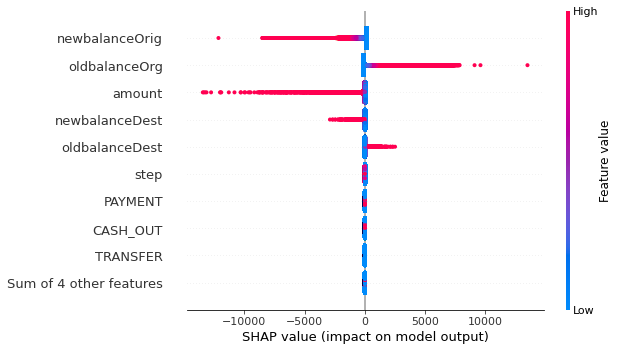

In [23]:
shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())


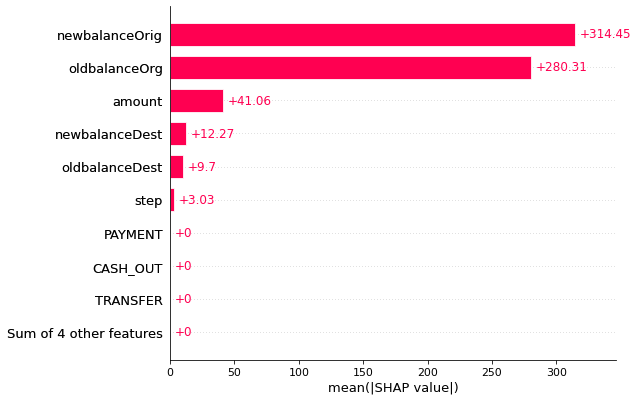

In [28]:
shap.plots.bar(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())


In [ ]:
shap.plots.waterfall(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())
